<a href="https://colab.research.google.com/github/020/020.github.io/blob/master/pycaret_time_series_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install pycaret

In [5]:
from pycaret.utils import enable_colab
enable_colab()

Colab mode enabled.


In [6]:
# read csv file
import pandas as pd

In [7]:
data = pd.read_csv('/content/AirPassengers.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.head()

,Date,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [8]:
# create 12 month moving average
data['MA12'] = data['Passengers'].rolling(12).mean()

In [9]:
!pip install --upgrade plotly

In [10]:
# plot the data and MA
import plotly.express as px

In [12]:
import matplotlib.pyplot as plt

In [ ]:
fig = plt.line(data, x="Date", y=["Passengers", "MA12"], template = 'plotly_dark')

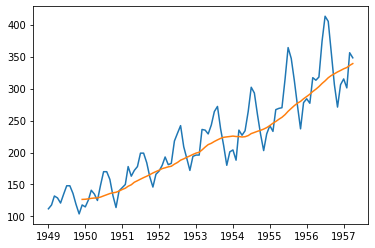

In [18]:

plt.plot(data['Date'],data['Passengers'])
plt.plot(data['Date'],data['MA12'])

In [15]:
import numpy as np

In [16]:
# extract month and year from dates
data['Month'] = [i.month for i in data['Date']]
data['Year'] = [i.year for i in data['Date']]
# create a sequence of numbers
data['Series'] = np.arange(1,len(data)+1)
# drop unnecessary columns and re-arrange
data.drop(['Date', 'MA12'], axis=1, inplace=True)
data = data[['Series', 'Year', 'Month', 'Passengers']] 
# check the head of the dataset
data.head()

,Series,Year,Month,Passengers
0,1,1949,1,112
1,2,1949,2,118
2,3,1949,3,132
3,4,1949,4,129
4,5,1949,5,121


In [18]:
# split data into train-test set
train = data[data['Year'] < 1960]
test = data[data['Year'] >= 1960]
# check shape
train.shape, test.shape

((132, 4), (12, 4))

In [19]:
# import the regression module
from pycaret.regression import *
# initialize setup
s = setup(data = train, test_data = test, target = 'Passengers', fold_strategy = 'timeseries', numeric_features = ['Year', 'Series'], fold = 3, transform_target = True, session_id = 123)

,Description,Value
0,session_id,123
1,Target,Passengers
2,Original Data,"(132, 4)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,1
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(132, 13)"


In [20]:
best = compare_models(sort = 'MAE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lar,Least Angle Regression,22.3980,923.8651,28.2855,0.5621,0.0878,0.0746,0.0200
lr,Linear Regression,22.3981,923.8747,28.2856,0.5621,0.0878,0.0746,1.2667
huber,Huber Regressor,22.4244,892.2573,27.9475,0.5981,0.0880,0.0749,0.0400
br,Bayesian Ridge,22.4783,932.2165,28.5483,0.5611,0.0884,0.0746,0.0200
ridge,Ridge Regression,23.1976,1003.9423,30.0409,0.5258,0.0933,0.0764,0.0200
lasso,Lasso Regression,38.4188,2413.5096,46.8468,0.0882,0.1473,0.1241,0.0200
en,Elastic Net,40.6486,2618.8753,49.4048,-0.0824,0.1563,0.1349,0.0233
omp,Orthogonal Matching Pursuit,44.3054,3048.2658,53.8613,-0.4499,0.1713,0.1520,0.0200
gbr,Gradient Boosting Regressor,50.1217,4032.0567,61.2306,-0.6189,0.2034,0.1538,0.0433
rf,Random Forest Regressor,52.7754,4705.6863,65.6728,-0.7962,0.2148,0.1592,0.2567


In [21]:
prediction_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Least Angle Regression,25.0714,972.2733,31.1813,0.8245,0.0692,0.0571


In [22]:
# generate predictions on the original dataset
predictions = predict_model(best, data=data)
# add a date column in the dataset
predictions['Date'] = pd.date_range(start='1949-01-01', end = '1960-12-01', freq = 'MS')
# line plot
fig = px.line(predictions, x='Date', y=["Passengers", "Label"], template = 'plotly_dark')
# add a vertical rectange for test-set separation
fig.add_vrect(x0="1960-01-01", x1="1960-12-01", fillcolor="grey", opacity=0.25, line_width=0)
fig.show()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Least Angle Regression,12.5381,278.7548,16.696,0.9805,0.0538,0.0447
